## Implementação do Perceptron para classificar tipo de flores

2) Parte 1: Perceptron.

2.1 Executar as implementações (scikit learn) desta página: https://towardsdatascience.com/perceptron-explanation-implementation-and-a-visual-example-3c8e76b4e2d1

2.2 Gerar uma versão binária da base de dados iris (que vocês já usaram na atividade anterior, com kNN. Vocês já devem ter separado os conjuntos em treinamento e teste https://archive.ics.uci.edu/ml/datasets/iris). A versão binária, vai ter apenas as classes Setosa e Versicolor. A outra classe deve ser eliminada. Além disso, cortar dois atributos para que base fique 2D (ou seja, com apenas duas entradas). Portanto, a base de dados terá apenas duas entradas, sepal length e petal length. Isso deve ser feito tanto no conjunto de treinamento quanto no de teste. Plotar as duas bases separadamente (treinamento e teste) e dizer se elas são linearmente separáveis ou não. Treinar o perceptron na base de treinamento e testar na base de testes.

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

### Implementação do Perceptron do towardsdatascience.com

In [2]:
def fit(self, X, y, n_iter=100):

    n_samples = X.shape[0]
    n_features = X.shape[1]

    # Add 1 for the bias term
    self.weights = np.zeros((n_features+1,))

    # Add column of 1s
    X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)

    for i in range(n_iter):
        for j in range(n_samples):
            if y[j]*np.dot(self.weights, X[j, :]) <= 0:
                self.weights += y[j]*X[j, :]

def predict(self, X):
    if not hasattr(self, 'weights'):
        print('The model is not trained yet!')
        return

    n_samples = X.shape[0]
    # Add column of 1s
    X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
    y = np.matmul(X, self.weights)
    y = np.vectorize(lambda val: 1 if val > 0 else -1)(y)

    return y

def score(self, X, y):
    pred_y = self.predict(X)

    return np.mean(y == pred_y)

class Perceptron:    
    def fit(self, X, y, n_iter=100):
        
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        # Add 1 for the bias term
        self.weights = np.zeros((n_features+1,))
        
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        
        for i in range(n_iter):
            for j in range(n_samples):
                if y[j]*np.dot(self.weights, X[j, :]) <= 0:
                    self.weights += y[j]*X[j, :]
    
    def predict(self, X):
        if not hasattr(self, 'weights'):
            print('The model is not trained yet!')
            return
        
        n_samples = X.shape[0]
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        y = np.matmul(X, self.weights)
        y = np.vectorize(lambda val: 1 if val > 0 else -1)(y)
        
        return y
    
    def score(self, X, y):
        pred_y = self.predict(X)
        
        return np.mean(y == pred_y)

X, y = datasets.make_classification(
    n_features=2,
    n_classes=2,
    n_samples=200,
    n_redundant=0,
    n_clusters_per_class=1
)

X, y = datasets.make_circles(n_samples=200, noise=0.03, factor=0.7)

def polynom(indices_list, indices, a, b, p):
    indices = [*indices]
    if p == 0:
        indices_list.append(indices)
        return
    for i in range(a, b):
        indices.append(i)
        polynom(indices_list, indices, i, b, p-1)
        indices = indices[0:-1]

def polynomial_features(X, p):
    n, d = X.shape
    features = []
    for i in range(1, p+1):
        l = []
        polynom(l, [], 0, d, i)
        for indices in l:
            x = np.ones((n,))
            for idx in indices:
                x = x * X[:, idx]
            features.append(x)
    return np.stack(features, axis=1)

X = polynomial_features(X, 2)

### Inicialização do Dataframe e redução das classes e features

In [3]:
dfCollumns = ['sepal length','sepal width', 'petal length', 'petal width','class']
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']

df = pd.read_csv('Data/iris.data', sep = ",", names = dfCollumns)
df = df[df['class'] != 'Iris-virginica'].drop(['sepal width', 'petal width'], axis = 1)

setosa = df[df['class'] == 'Iris-setosa'].sample(frac=1).reset_index(drop=True)
versicolor = df[df['class'] == 'Iris-versicolor'].sample(frac=1).reset_index(drop=True)

test = pd.concat([setosa.loc[0:13, :],versicolor.loc[0:13,:]]).reset_index(drop = True)
train = pd.concat([setosa.loc[13:49, :],versicolor.loc[13:49,:]]).reset_index(drop = True)

trainX = train[['sepal length', 'petal length']].to_numpy()
trainY = train['class'].to_numpy()

testX = test[['sepal length', 'petal length']].to_numpy()
testY = test['class'].to_numpy()

### Plotting dos dados de testes e treinos divididos por classes

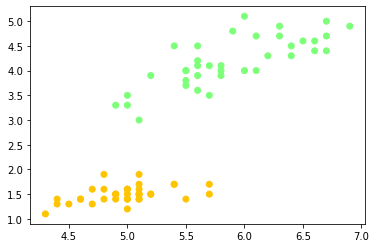

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = trainX[ : , 0]
y = trainX[ : , 1]
points = [0.7 if x == 'Iris-setosa' else 0.5 for x in trainY]
color = points
rgb = plt.get_cmap('jet')(color)
ax.scatter(x, y, color = rgb)
plt.show()

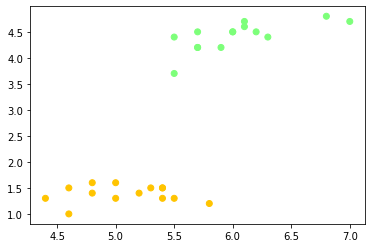

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x = testX[ : , 0]
y = testX[ : , 1]
points = [0.7 if x == 'Iris-setosa' else 0.5 for x in testY]
color = points
rgb = plt.get_cmap('jet')(color)
ax.scatter(x, y, color = rgb)
plt.show()

### Execução do treino e validação do modelo

In [6]:
aux = [1 if x == 'Iris-setosa' else -1 for x in trainY]
trainY = aux
aux = [1 if x == 'Iris-setosa' else -1 for x in testY]
testY = aux

Neuron = Perceptron()

In [7]:
Neuron.fit(trainX, trainY, n_iter = 10)
Neuron.predict(testX)
score = Neuron.score(testX, testY)

print("Pesos: ",Neuron.weights)
print("Acurácia para Número de iterações 10 é",score)

Pesos:  [ 3.  -6.8  1. ]
Acurácia para Número de iterações 10 é 1.0
